In [1]:
# Importing requried librarires :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset :

df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [4]:
# Number of rows and columns :

df.shape

(101766, 50)

# Dropping records for 'readmitted'= '>30'

#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']
#dropping rows with NAs.
df.dropna(inplace=True)

In [5]:
#removing readmitted'= '>30' entries for df
df=df[df['readmitted']!='>30']

# dropping rows with NAs.
#df.dropna(inplace=True)

In [6]:
df.shape

(66221, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66221 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                66221 non-null int64
patient_nbr                 66221 non-null int64
race                        66221 non-null object
gender                      66221 non-null object
age                         66221 non-null object
weight                      66221 non-null object
admission_type_id           66221 non-null int64
discharge_disposition_id    66221 non-null int64
admission_source_id         66221 non-null int64
time_in_hospital            66221 non-null int64
payer_code                  66221 non-null object
medical_specialty           66221 non-null object
num_lab_procedures          66221 non-null int64
num_procedures              66221 non-null int64
num_medications             66221 non-null int64
number_outpatient           66221 non-null int64
number_emergency            66221 non-null int64
number_inpatient            66221 non-null int64
di

In [8]:
#pd.options.display.max_colwidth = None   # to view all the data

#replacing 0 with np.nan for all columns accept 'outcome'

#df_ind=df[:]

df.iloc[:,:-1]=df.iloc[:,:-1].replace({0:np.nan})

# Missing value percentage calculation :

In [9]:
# checking missing value percentage:

percenatge = []
for i in df.columns:
    p = (df[df[i]=='?'].shape[0]/df.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing[df_missing['percentage of missing']>0]

/home/shrihari/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


percentage of missing
weight                         97.452470
medical_specialty              47.919844
payer_code                     39.908790
race                            2.620015
diag_3                          1.638453
diag_2                          0.428867
diag_1                          0.025672

In [10]:
df1 = df.copy()

# Dropping unwanted columns :

In [11]:
# Since feature 'weight' as many missing values we can drop it  (we need to do general code to drop features which have more then 50% missing values)
# And also 'encounter_id', 'patient_nbr' are not use for modeling 
# glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,examide,citoglipton have more single values 
# 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','examide','citoglipton'


df1 = df1.drop(['weight','encounter_id','patient_nbr'],axis=1)

In [12]:
#dropping cols with high number of missing values
df1 = df1.drop(['payer_code','medical_specialty'],axis=1)

In [13]:
df1.shape

(66221, 45)

In [14]:
#Dropping admission_type_id', 'discharge_disposition_id', 'admission_source_id' :

df1=df1.drop(['admission_type_id','discharge_disposition_id','admission_source_id'],axis=1) 

In [15]:
df1.shape

(66221, 42)

In [16]:
df1=df1.reset_index(drop=bool)


In [17]:
df1.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female   [0-10)                 1                  41   
1  AfricanAmerican  Female  [20-30)                 2                  11   
2        Caucasian    Male  [30-40)                 2                  44   
3        Caucasian    Male  [40-50)                 1                  51   
4        Caucasian    Male  [60-70)                 4                  70   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               1               21                  0                 0   

   number_inpatient  ... citoglipton insulin glyburide-metformin  \
0                 0  ...          No      No                  No   
1                 1  ...          No      No                  No   
2                 0  ...          No      Up                  No   
3                 0  ...          No  Steady                  No   
4                 0  ...          No  Steady                  No   

   glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                   No                       No                      No   
1                   No                       No                      No   
2                   No                       No                      No   
3                   No                       No                      No   
4                   No                       No                      No   

  metformin-pioglitazone change diabetesMed readmitted  
0                     No     No          No         NO  
1                     No     No         Yes         NO  
2                     No     Ch         Yes         NO  
3                     No     Ch         Yes         NO  
4                     No     Ch         Yes         NO  

[5 rows x 42 columns]

# Assigning proper datatypes to all the columns:¶

#Converting  admission_type_id, discharge_disposition_id, admission_source_id  into categorical columns :

for i in ['admission_type_id','discharge_disposition_id','admission_source_id']:
    df[i] = df[i].astype(np.object)

# Missing values imputation :

In [18]:
# 1). gender : Replacing 'Unknown/Invalid' with mode of gender, because only 3 values are missing/unkown :

df1.replace(['Unknown/Invalid'],df1['gender'].mode()[0],inplace=True)
df1['gender'].value_counts()

Female    35193
Male      31028
Name: gender, dtype: int64

In [19]:
# Replace '?' with 'NaN' :

df1.replace(['?'],np.nan,inplace=True)

In [20]:
# 2). race : we will include nan values in 'Other' , which is already present in it

df1['race']=df1['race'].fillna('Other')

In [21]:
df1['race'].value_counts()

Caucasian          48975
AfricanAmerican    12576
Other               2795
Hispanic            1395
Asian                480
Name: race, dtype: int64

In [22]:
# 3). diag_1 : 21 missing values (i,e ... 0.02%, so impute with mode)

df1['diag_1'] = df1['diag_1'].fillna('Other')

In [23]:
# 4). diag_2 : 0.35% of missing values, so impute with mode 
df1['diag_2'] = df1['diag_2'].fillna('Other')

In [24]:
# 5). diag_3 : 1.3% of missing values, so impute with mode 
df1['diag_3'] = df1['diag_3'].fillna('Other')

In [25]:
percenatge = []
for i in df1.columns:
    p = (df1[df1[i]=='?'].shape[0]/df1.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df1.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing

percentage of missing
race                                        0.0
examide                                     0.0
glyburide                                   0.0
tolbutamide                                 0.0
pioglitazone                                0.0
rosiglitazone                               0.0
acarbose                                    0.0
miglitol                                    0.0
troglitazone                                0.0
tolazamide                                  0.0
citoglipton                                 0.0
gender                                      0.0
insulin                                     0.0
glyburide-metformin                         0.0
glipizide-metformin                         0.0
glimepiride-pioglitazone                    0.0
metformin-rosiglitazone                     0.0
metformin-pioglitazone                      0.0
change                                      0.0
diabetesMed                                 0.0
glipizide                                   0.0
acetohexamide                               0.0
glimepiride                                 0.0
chlorpropamide                              0.0
age                                         0.0
time_in_hospital                            0.0
num_lab_procedures                          0.0
num_procedures                              0.0
num_medications                             0.0
number_outpatient                           0.0
number_emergency                            0.0
number_inpatient                            0.0
diag_1                                      0.0
diag_2                                      0.0
diag_3                                      0.0
number_diagnoses                            0.0
max_glu_serum                               0.0
A1Cresult                                   0.0
metformin                                   0.0
repaglinide                                 0.0
nateglinide                                 0.0
readmitted                                  0.0

# Converting Columns diag_1,diag_2,diag_3 to respective labels:

In [26]:
db1=df1.copy()

In [27]:
for i in db1['diag_1']:
    if i[:3]=='250':
        db1['diag_1'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_1'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_1'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_1'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_1'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_1'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_1'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5 :
        db1['diag_1'].replace({i:'Other'},inplace=True)

In [28]:
db1['diag_1'].value_counts()

Circulatory        19598
Neoplasms           9511
Respiratory         8891
Digestive           6111
Diabetes            5439
Other               5047
Injury              4737
Musculoskeletal     3486
Genitourinary       3401
Name: diag_1, dtype: int64

In [29]:
df1['diag_1']=db1['diag_1'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main df1

In [30]:
for i in db1['diag_2']:
    if i[:3]=='250':
        db1['diag_2'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_2'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_2'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_2'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_2'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_2'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_2'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_2'].replace({i:'Other'},inplace=True)

In [31]:
db1['diag_2'].value_counts()

Circulatory        20246
Neoplasms          12223
Diabetes            8597
Other               7277
Respiratory         6832
Genitourinary       5349
Digestive           2775
Injury              1753
Musculoskeletal     1169
Name: diag_2, dtype: int64

In [32]:
df1['diag_2']=db1['diag_2'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [33]:
for i in db1['diag_3']:
    if i[:3]=='250':
        db1['diag_3'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_3'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_3'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_3'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_3'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_3'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_3'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_3'].replace({i:'Other'},inplace=True)

In [34]:
db1['diag_3'].value_counts()

Circulatory        19312
Neoplasms          11844
Diabetes           11335
Other               9771
Respiratory         4627
Genitourinary       4178
Digestive           2512
Injury              1373
Musculoskeletal     1268
365.44                 1
Name: diag_3, dtype: int64

In [35]:
df1['diag_3']=db1['diag_3'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [36]:
df1.shape

(66221, 42)

In [37]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [38]:

#apart from metamorphin,insulin all medications should be merged

keys = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df1[colname] = df1[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df1['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df1['numchange'] = df1['numchange'] + df1[colname]
    del df1[colname]
    
df1['numchange'].value_counts()

0    63659
1     2506
2       55
3        1
Name: numchange, dtype: int64

In [39]:
len(keys)

19

In [40]:


#Dropping the medication cols that are merged.(19 columns)
df_merged=df1.drop(keys,axis=1)
df_merged.shape

(66221, 24)

In [41]:
df_merged.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'examide', 'citoglipton', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'numchange'],
      dtype='object')

In [42]:
df_merged.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female   [0-10)                 1                  41   
1  AfricanAmerican  Female  [20-30)                 2                  11   
2        Caucasian    Male  [30-40)                 2                  44   
3        Caucasian    Male  [40-50)                 1                  51   
4        Caucasian    Male  [60-70)                 4                  70   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               1               21                  0                 0   

   number_inpatient  ... max_glu_serum A1Cresult metformin  examide  \
0                 0  ...          None      None        No       No   
1                 1  ...          None      None        No       No   
2                 0  ...          None      None        No       No   
3                 0  ...          None      None        No       No   
4                 0  ...          None      None    Steady       No   

  citoglipton insulin change diabetesMed readmitted numchange  
0          No      No     No          No         NO         0  
1          No      No     No         Yes         NO         0  
2          No      Up     Ch         Yes         NO         0  
3          No  Steady     Ch         Yes         NO         0  
4          No  Steady     Ch         Yes         NO         0  

[5 rows x 24 columns]

In [43]:
#Col:'change': any change is there in medication or not
#Col:'numchange': number of medications that are changed

In [44]:
#Converting 'numchange' from int to object as it is categorical data:

df_merged['numchange']=df_merged['numchange'].astype('object')

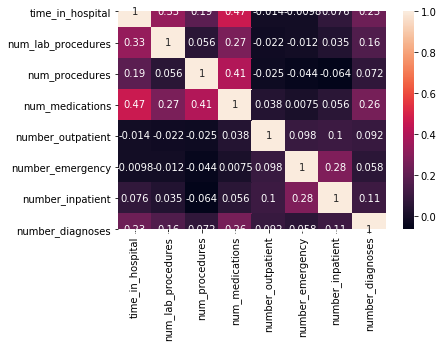

In [45]:
sns.heatmap(df_merged.corr(),annot=True)
plt.show()

# Determining X and y

In [46]:
X=df_merged.drop('readmitted',axis=1)
y=df_merged['readmitted']

In [47]:
X.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female   [0-10)                 1                  41   
1  AfricanAmerican  Female  [20-30)                 2                  11   
2        Caucasian    Male  [30-40)                 2                  44   
3        Caucasian    Male  [40-50)                 1                  51   
4        Caucasian    Male  [60-70)                 4                  70   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               1               21                  0                 0   

   number_inpatient  ... number_diagnoses max_glu_serum A1Cresult  metformin  \
0                 0  ...                1          None      None         No   
1                 1  ...                6          None      None         No   
2                 0  ...                7          None      None         No   
3                 0  ...                5          None      None         No   
4                 0  ...                7          None      None     Steady   

  examide citoglipton insulin change diabetesMed numchange  
0      No          No      No     No          No         0  
1      No          No      No     No         Yes         0  
2      No          No      Up     Ch         Yes         0  
3      No          No  Steady     Ch         Yes         0  
4      No          No  Steady     Ch         Yes         0  

[5 rows x 23 columns]

In [48]:
# Numerical columns :

num_cols=['time_in_hospital','num_lab_procedures', 'num_procedures','num_medications','number_outpatient','number_emergency'
,'number_inpatient','number_diagnoses']


# Categorical columns :

cat_cols=['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum','A1Cresult', 'metformin', 'examide', 'citoglipton',
          'insulin', 'change', 'diabetesMed', 'numchange']

In [49]:
# lets apply power transformation on numerical columns :

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()


df_num=pd.DataFrame(pt.fit_transform(X[num_cols]),columns=num_cols)
df_num.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0         -1.609432           -0.083412       -1.039535        -3.246301   
1         -0.797658           -1.609688        1.536346        -0.196540   
2         -0.797658            0.068448        0.253458         0.196174   
3         -1.609432            0.422427       -1.039535        -1.022968   
4          0.174851            1.381108        0.253458         0.747695   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  
0          -0.402508         -0.316918         -0.630909         -2.134318  
1           2.496805         -0.316918          1.473538         -0.814811  
2          -0.402508         -0.316918         -0.630909         -0.324928  
3          -0.402508         -0.316918         -0.630909         -1.225009  
4          -0.402508         -0.316918         -0.630909         -0.324928

In [50]:
df_num.shape

(66221, 8)

In [51]:
df_cat=X[cat_cols]
df_cat

race  gender      age       diag_1         diag_2  \
0            Caucasian  Female   [0-10)     Diabetes          Other   
1      AfricanAmerican  Female  [20-30)        Other       Diabetes   
2            Caucasian    Male  [30-40)    Neoplasms       Diabetes   
3            Caucasian    Male  [40-50)    Neoplasms      Neoplasms   
4            Caucasian    Male  [60-70)  Circulatory    Circulatory   
...                ...     ...      ...          ...            ...   
66216        Caucasian    Male  [80-90)  Circulatory      Neoplasms   
66217  AfricanAmerican  Female  [80-90)    Digestive      Neoplasms   
66218        Caucasian    Male  [70-80)    Neoplasms  Genitourinary   
66219        Caucasian  Female  [80-90)       Injury          Other   
66220        Caucasian    Male  [70-80)    Digestive      Digestive   

            diag_3 max_glu_serum A1Cresult metformin examide citoglipton  \
0            Other          None      None        No      No          No   
1            Other          None      None        No      No          No   
2      Circulatory          None      None        No      No          No   
3         Diabetes          None      None        No      No          No   
4            Other          None      None    Steady      No          No   
...            ...           ...       ...       ...     ...         ...   
66216     Diabetes          None      None        No      No          No   
66217    Digestive          None      None        No      No          No   
66218        Other          None      None    Steady      No          No   
66219       Injury          None      None        No      No          No   
66220    Digestive          None      None        No      No          No   

      insulin change diabetesMed numchange  
0          No     No          No         0  
1          No     No         Yes         0  
2          Up     Ch         Yes         0  
3      Steady     Ch         Yes         0  
4      Steady     Ch         Yes         0  
...       ...    ...         ...       ...  
66216      Up     Ch         Yes         0  
66217  Steady     No         Yes         0  
66218    Down     Ch         Yes         0  
66219      Up     Ch         Yes         0  
66220      No     No          No         0  

[66221 rows x 15 columns]

In [52]:
# Lets apply get dummies on categorical columns :

# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables

df_cat=pd.get_dummies(X[cat_cols],drop_first=True)
df_cat.head()
#dummy_var = pd.get_dummies(data = X, drop_first = True)

race_Asian  race_Caucasian  race_Hispanic  race_Other  gender_Male  \
0           0               1              0           0            0   
1           0               0              0           0            0   
2           0               1              0           0            1   
3           0               1              0           0            1   
4           0               1              0           0            1   

   age_[10-20)  age_[20-30)  age_[30-40)  age_[40-50)  age_[50-60)  ...  \
0            0            0            0            0            0  ...   
1            0            1            0            0            0  ...   
2            0            0            1            0            0  ...   
3            0            0            0            1            0  ...   
4            0            0            0            0            0  ...   

   metformin_Steady  metformin_Up  insulin_No  insulin_Steady  insulin_Up  \
0                 0             0           1               0           0   
1                 0             0           1               0           0   
2                 0             0           0               0           1   
3                 0             0           0               1           0   
4                 1             0           0               1           0   

   change_No  diabetesMed_Yes  numchange_1  numchange_2  numchange_3  
0          1                0            0            0            0  
1          1                1            0            0            0  
2          0                1            0            0            0  
3          0                1            0            0            0  
4          0                1            0            0            0  

[5 rows x 56 columns]

In [53]:
df_cat.shape

(66221, 56)

In [65]:
X=pd.concat([df_num,df_cat],axis=1)
X.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0         -1.609432           -0.083412       -1.039535        -3.246301   
1         -0.797658           -1.609688        1.536346        -0.196540   
2         -0.797658            0.068448        0.253458         0.196174   
3         -1.609432            0.422427       -1.039535        -1.022968   
4          0.174851            1.381108        0.253458         0.747695   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0          -0.402508         -0.316918         -0.630909         -2.134318   
1           2.496805         -0.316918          1.473538         -0.814811   
2          -0.402508         -0.316918         -0.630909         -0.324928   
3          -0.402508         -0.316918         -0.630909         -1.225009   
4          -0.402508         -0.316918         -0.630909         -0.324928   

   race_Asian  race_Caucasian  ...  metformin_Steady  metformin_Up  \
0           0               1  ...                 0             0   
1           0               0  ...                 0             0   
2           0               1  ...                 0             0   
3           0               1  ...                 0             0   
4           0               1  ...                 1             0   

   insulin_No  insulin_Steady  insulin_Up  change_No  diabetesMed_Yes  \
0           1               0           0          1                0   
1           1               0           0          1                1   
2           0               0           1          0                1   
3           0               1           0          0                1   
4           0               1           0          0                1   

   numchange_1  numchange_2  numchange_3  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 64 columns]

# Encoding 'y'

In [55]:
y.value_counts()

NO     54864
<30    11357
Name: readmitted, dtype: int64

In [56]:
#y=y.replace({'NO':0,'<30':1,'>30':2})
y=y.replace({'NO':0,'<30':1})

In [66]:
y.value_counts()

0    54864
1    11357
Name: readmitted, dtype: int64

In [58]:
X.shape,y.shape

((66221, 64), (66221,))

In [67]:
X.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Male', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)',
       'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)',
       'diag_1_Diabetes', 'diag_1_Digestive', 'diag_1_Genitourinary',
       'diag_1_Injury', 'diag_1_Musculoskeletal', 'diag_1_Neoplasms',
       'diag_1_Other', 'diag_1_Respiratory', 'diag_2_Diabetes',
       'diag_2_Digestive', 'diag_2_Genitourinary', 'diag_2_Injury',
       'diag_2_Musculoskeletal', 'diag_2_Neoplasms', 'diag_2_Other',
       'diag_2_Respiratory', 'diag_3_Circulatory', 'diag_3_Diabetes',
       'diag_3_Digestive', 'diag_3_Genitourinary', 'diag_3_Injury',
       'diag_3_Musculoskeletal', 'diag_3_Neoplasms', 'diag_3_Other',
       'diag_3_Respiratory', 'max_gl

In [68]:
# Based on RFE we are going to use these 31 features :

X1 = X[['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian', 'race_Other',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[70-80)',
       'age_[80-90)', 'diag_1_Diabetes', 'diag_1_Genitourinary',
       'diag_1_Injury', 'diag_1_Neoplasms', 'diag_1_Respiratory',
       'diag_2_Diabetes', 'diag_2_Genitourinary', 'diag_2_Respiratory',
       'diag_3_Diabetes', 'diag_3_Genitourinary', 'max_glu_serum_None',
       'A1Cresult_Norm', 'metformin_No', 'insulin_Steady', 'insulin_Up',
       'diabetesMed_Yes']]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=0)


In [70]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((46354, 31), (46354,), (19867, 31), (19867,))

## Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# This technique generates synthetic data for the minority class.
# SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class 
#    and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen 
#    point and its neighbors.

In [ ]:
# SMOTE algorithm works in 4 simple steps:

# 1. Choose a minority class as the input vector.
# 2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
# 3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point 
#    under consideration and its chosen neighbor.
# 4. Repeat the steps until data is balanced.

In [71]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_train_res, y_train_res = smote.fit_sample(X_train, y_train)

print('Before sampling counts of label:\n\n',y_train.value_counts())
print('\nBefore sampling shape of X_train and y_train:\n\n',X_train.shape,y_train.shape)
print('\n\nAfter sampling counts of label:\n\n',y_train_res.value_counts())
print('\nAfter sampling shape of X_train and y_train:\n\n',X_train_res.shape,y_train_res.shape)

Before sampling counts of label:

 0    38393
1     7961
Name: readmitted, dtype: int64

Before sampling shape of X_train and y_train:

 (46354, 31) (46354,)


After sampling counts of label:

 1    38393
0    38393
Name: readmitted, dtype: int64

After sampling shape of X_train and y_train:

 (76786, 31) (76786,)


In [72]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [84]:
# create an empty dataframe to store the scores for various algorithms
final_RFE_SMOTE_df=pd.DataFrame(columns=['Model','Accuracy','BE','VE','PRECISON','RECALL','Comments'])

# creating a function to update the evaluation df for comparision of the scores from different algorithms
def eval_test_train(Modelt,Accuracyt,BE,VE,Precisont,Recallt,Commentst):
    
    # assign 'final_df' as global variable
    global final_RFE_SMOTE_df

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    new={'Model':Modelt,'Accuracy':Accuracyt,'BE':BE,'VE':VE,'PRECISON':Precisont,'RECALL':Recallt,'Comments':Commentst}
    final_RFE_SMOTE_df = final_RFE_SMOTE_df.append(new, ignore_index=True) 
    final_RFE_SMOTE_df.drop_duplicates('Model',keep='last')
    print(final_RFE_SMOTE_df)

# Base Models :

### model 1 : Logistic Regression 

In [75]:
# grid searching key hyperparametres for logistic regression

from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold


# define dataset
X_train_res, y_train_res = make_blobs(n_samples=10000, centers=2, n_features=31, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("\n%f (%f) with: %r" % (mean, stdev, param))

/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.884400 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

0.884200 (0.011656) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

0.884200 (0.011656) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

0.884200 (0.011656) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

0.884000 (0.012145) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}

0.884200 (0.012019) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}

0.884200 (0.011656) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

0.884200 (0.011656) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

0.884200 (0.011656) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

0.884000 (0.012145) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}

0.884200 (0.012019) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

0.884200 (0.011656) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

0.884200 (0.011656) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

0.884100 (0.011796) with: {'C

In [76]:
#creating model with best hyperparameter:



log_model = LogisticRegression(penalty='l2',solver = 'liblinear',C=0.01,random_state = 0).fit(X_train_res, y_train_res)

y_train_pred=log_model.predict(X_train_res)
y_test_pred=log_model.predict(X_test)


train_accuracyt =accuracy_score(y_train_res,y_train_pred)           
test_accuracyt  =accuracy_score(y_test,y_test_pred) 

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=confusion_matrix(y_test,y_test_pred)
print('\nConfussion matrix:\n',cm)

training accuracy: 0.8858
test accuracy: 0.814969547490814

Confussion matrix:
 [[16145   326]
 [ 3350    46]]


In [78]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
auc=cross_val_score(log_model,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE = np.mean(1-auc)
VE = np.std(1-auc)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.04427258529178746
Var_error 0.003237998445894961


In [79]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     16471
           1       0.12      0.01      0.02      3396

    accuracy                           0.81     19867
   macro avg       0.48      0.50      0.46     19867
weighted avg       0.71      0.81      0.75     19867



In [80]:

Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.12365591397849462
recall score : 0.013545347467608953


In [85]:
eval_test_train('LR',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

  Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0    LR   0.81497  0.044273  0.003238  0.123656  0.013545       __


## Model 2 : RandomForest :

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
RF = RandomForestClassifier()
kf=KFold(shuffle=True,n_splits=3,random_state=0)

params= {'n_estimators':sp_randint(1,100),
         'max_features':sp_randint(1,65),
        'criterion':['gini','entropy']}

rsearch_rf = RandomizedSearchCV(RF,params,cv=kf,scoring='roc_auc',random_state=0,n_jobs=-1)
rsearch_rf.fit(X_train_res,y_train_res)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff9fd78b410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff9fd78b510>},
                   random_state=0, scoring='roc_auc')

In [87]:
rsearch_rf.best_params_

{'criterion': 'entropy', 'max_features': 7, 'n_estimators': 89}

In [88]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
rf=RandomForestClassifier(n_estimators=89,criterion='entropy',random_state=0,max_features=7)
auc=cross_val_score(rf,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE = np.mean(1-auc)
VE = np.std(1-auc)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.06219596694677998
Var_error 0.0033613619784270757


In [89]:
#fitting data into rf model:
rf.fit(X_train_res,y_train_res)

# Accuracy:
y_train_pred=rf.predict(X_train_res)
y_test_pred=rf.predict(X_test)
#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train_res,y_train_pred)           #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)                #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nConfussion matrix:\n',cm)

training accuracy: 1.0
test accuracy: 0.5918860421805003

Confussion matrix:
 [[10803  5668]
 [ 2440   956]]


In [90]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.66      0.73     16471
           1       0.14      0.28      0.19      3396

    accuracy                           0.59     19867
   macro avg       0.48      0.47      0.46     19867
weighted avg       0.70      0.59      0.64     19867



In [91]:
Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.14432367149758454
recall score : 0.28150765606595995


In [92]:
eval_test_train('RF',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

  Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0    LR  0.814970  0.044273  0.003238  0.123656  0.013545       __
1    RF  0.591886  0.062196  0.003361  0.144324  0.281508       __


## Model 3 : Boosted RF :

In [94]:
rf=RandomForestClassifier(n_estimators=89,criterion='entropy',random_state=0)

RF_be=[]
RF_ve=[]
for n in np.arange(1,20):
    RF_boost=AdaBoostClassifier(base_estimator=rf,n_estimators=n,random_state=0)
    kfold =KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(RF_boost,X_train_res,y_train_res,cv=kfold,scoring='roc_auc')
    RF_be.append(np.mean(1-scores))
    RF_ve.append(np.std(scores,ddof=1))

In [95]:
np.min(RF_be),np.argmin(RF_be)

(0.05992057890646526, 0)

In [96]:
RF_ve[0]

0.004012208046644434

In [97]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
RF_boost=AdaBoostClassifier(n_estimators=1,base_estimator=RF,random_state=0)
auc=cross_val_score(RF_boost,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE= np.mean(1-auc)
VE = np.std(auc,ddof=1)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.058627555236725505
Var_error 0.004580569874947054


In [98]:
#fitting data into rf model:
RF_boost.fit(X_train_res,y_train_res)

# Accuracy:
y_train_pred=RF_boost.predict(X_train_res)
y_test_pred=RF_boost.predict(X_test)
#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train_res,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

training accuracy: 1.0
test accuracy: 0.5601751648462274

confussion matrix:
 [[10087  6384]
 [ 2354  1042]]


In [99]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.61      0.70     16471
           1       0.14      0.31      0.19      3396

    accuracy                           0.56     19867
   macro avg       0.48      0.46      0.45     19867
weighted avg       0.70      0.56      0.61     19867



In [100]:
Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.14031780231618637
recall score : 0.30683156654888105


In [101]:
eval_test_train('BoostedRF',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.814970  0.044273  0.003238  0.123656  0.013545       __
1         RF  0.591886  0.062196  0.003361  0.144324  0.281508       __
2  BoostedRF  0.560175  0.058628  0.004581  0.140318  0.306832       __


## Model 4 : Gboost :

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

GB_be=[]
GB_ve=[]
for n in np.arange(1,150):
    GB=GradientBoostingClassifier(n_estimators=n,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(GB,X_train_res,y_train_res,cv=kfold,scoring='roc_auc')
    GB_be.append(np.mean(1-scores))
    GB_ve.append(np.std(scores,ddof=1))

In [103]:
np.min(GB_be),np.argmin(GB_be)

(0.054717985225051634, 148)

In [104]:
GB_ve[148]

0.005359161320634376

In [105]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
GB=GradientBoostingClassifier(n_estimators=149,random_state=0)
auc=cross_val_score(GB,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE= np.mean(1-auc)
VE = np.std(auc,ddof=1)
print('Bias_error',BE)
print('Var_error',VE)

Bias_error 0.054717985225051634
Var_error 0.005359161320634376


In [106]:
#fitting data into rf model:
GB.fit(X_train_res,y_train_res)

# Accuracy:
y_train_pred=GB.predict(X_train_res)
y_test_pred=GB.predict(X_test)

#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train_res,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

training accuracy: 0.9189
test accuracy: 0.7276387980067448

confussion matrix:
 [[14103  2368]
 [ 3043   353]]


In [107]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     16471
           1       0.13      0.10      0.12      3396

    accuracy                           0.73     19867
   macro avg       0.48      0.48      0.48     19867
weighted avg       0.70      0.73      0.72     19867



In [108]:
from sklearn.metrics import precision_score,recall_score

Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.12973171628077912
recall score : 0.10394581861012957


In [109]:
eval_test_train('GBoost',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.814970  0.044273  0.003238  0.123656  0.013545       __
1         RF  0.591886  0.062196  0.003361  0.144324  0.281508       __
2  BoostedRF  0.560175  0.058628  0.004581  0.140318  0.306832       __
3     GBoost  0.727639  0.054718  0.005359  0.129732  0.103946       __


## Model 5 : CATBOOST 

In [110]:
from catboost import CatBoostClassifier

In [111]:
cat_model = CatBoostClassifier()
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
params = {'iterations':[200,500,1000],
         'learning_rate':[0.03,0.01,0.1],
        'depth': [3,4,6],
        'l2_leaf_reg': [1, 3, 5]}

gs=GridSearchCV(estimator=cat_model,param_grid=params,cv=kfold,scoring='roc_auc')
gs.fit(X_train_res,y_train_res)



0:	learn: 0.6846880	total: 417ms	remaining: 1m 23s
1:	learn: 0.6769674	total: 430ms	remaining: 42.5s
2:	learn: 0.6694763	total: 439ms	remaining: 28.8s
3:	learn: 0.6619421	total: 445ms	remaining: 21.8s
4:	learn: 0.6553626	total: 449ms	remaining: 17.5s
5:	learn: 0.6483454	total: 453ms	remaining: 14.7s
6:	learn: 0.6422396	total: 457ms	remaining: 12.6s
7:	learn: 0.6362660	total: 461ms	remaining: 11.1s
8:	learn: 0.6310603	total: 464ms	remaining: 9.85s
9:	learn: 0.6254147	total: 468ms	remaining: 8.89s
10:	learn: 0.6200907	total: 472ms	remaining: 8.1s
11:	learn: 0.6147011	total: 475ms	remaining: 7.45s
12:	learn: 0.6097590	total: 479ms	remaining: 6.89s
13:	learn: 0.6044743	total: 483ms	remaining: 6.41s
14:	learn: 0.5998005	total: 487ms	remaining: 6s
15:	learn: 0.5950212	total: 490ms	remaining: 5.64s
16:	learn: 0.5905163	total: 494ms	remaining: 5.32s
17:	learn: 0.5862848	total: 498ms	remaining: 5.03s
18:	learn: 0.5819030	total: 502ms	remaining: 4.78s
19:	learn: 0.5777497	total: 506ms	remaining:

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff9ee5a8510>,
             param_grid={'depth': [3, 4, 6], 'iterations': [200, 500, 1000],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.01, 0.1]},
             scoring='roc_auc')

In [112]:

gs.best_params_


{'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [113]:
#Creating model with best hyperparameters:

cat_model = CatBoostClassifier(iterations=1000,l2_leaf_reg=1,depth=6,learning_rate=0.03)
auc=cross_val_score(cat_model,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE= np.mean(1-auc)
VE = np.std(auc,ddof=1)
print('Bias_error',BE)
print('Var_error',VE)



0:	learn: 0.6785484	total: 30.6ms	remaining: 30.6s
1:	learn: 0.6652429	total: 46.9ms	remaining: 23.4s
2:	learn: 0.6511912	total: 55.6ms	remaining: 18.5s
3:	learn: 0.6386150	total: 65ms	remaining: 16.2s
4:	learn: 0.6257411	total: 73.6ms	remaining: 14.6s
5:	learn: 0.6142029	total: 81.6ms	remaining: 13.5s
6:	learn: 0.6033184	total: 89.7ms	remaining: 12.7s
7:	learn: 0.5938231	total: 97.9ms	remaining: 12.1s
8:	learn: 0.5839067	total: 106ms	remaining: 11.7s
9:	learn: 0.5736281	total: 114ms	remaining: 11.3s
10:	learn: 0.5653904	total: 122ms	remaining: 11s
11:	learn: 0.5573095	total: 130ms	remaining: 10.7s
12:	learn: 0.5494001	total: 138ms	remaining: 10.5s
13:	learn: 0.5418124	total: 146ms	remaining: 10.3s
14:	learn: 0.5359330	total: 155ms	remaining: 10.1s
15:	learn: 0.5293123	total: 163ms	remaining: 10s
16:	learn: 0.5227625	total: 171ms	remaining: 9.86s
17:	learn: 0.5177652	total: 178ms	remaining: 9.73s
18:	learn: 0.5121605	total: 186ms	remaining: 9.63s
19:	learn: 0.5060594	total: 195ms	remai

In [114]:
#fitting data into rf model:
cat_model.fit(X_train_res,y_train_res)

# Accuracy:
y_train_pred=cat_model.predict(X_train_res)
y_test_pred=cat_model.predict(X_test)

#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train_res,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

0:	learn: 0.6789207	total: 35.1ms	remaining: 35.1s
1:	learn: 0.6651021	total: 72.2ms	remaining: 36s
2:	learn: 0.6520425	total: 106ms	remaining: 35.3s
3:	learn: 0.6394810	total: 127ms	remaining: 31.6s
4:	learn: 0.6280925	total: 141ms	remaining: 28s
5:	learn: 0.6168568	total: 153ms	remaining: 25.3s
6:	learn: 0.6068611	total: 164ms	remaining: 23.3s
7:	learn: 0.5967763	total: 177ms	remaining: 21.9s
8:	learn: 0.5877989	total: 189ms	remaining: 20.8s
9:	learn: 0.5789632	total: 200ms	remaining: 19.8s
10:	learn: 0.5706627	total: 212ms	remaining: 19.1s
11:	learn: 0.5631222	total: 225ms	remaining: 18.5s
12:	learn: 0.5563970	total: 240ms	remaining: 18.2s
13:	learn: 0.5490296	total: 255ms	remaining: 17.9s
14:	learn: 0.5426645	total: 269ms	remaining: 17.7s
15:	learn: 0.5365781	total: 292ms	remaining: 18s
16:	learn: 0.5302400	total: 311ms	remaining: 18s
17:	learn: 0.5238398	total: 325ms	remaining: 17.8s
18:	learn: 0.5174163	total: 338ms	remaining: 17.5s
19:	learn: 0.5117647	total: 351ms	remaining: 17

In [115]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     16471
           1       0.13      0.08      0.10      3396

    accuracy                           0.75     19867
   macro avg       0.48      0.48      0.48     19867
weighted avg       0.71      0.75      0.73     19867



In [116]:
from sklearn.metrics import precision_score,recall_score

Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.12745098039215685
recall score : 0.07656065959952886


In [117]:
eval_test_train('CatBoost',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.814970  0.044273  0.003238  0.123656  0.013545       __
1         RF  0.591886  0.062196  0.003361  0.144324  0.281508       __
2  BoostedRF  0.560175  0.058628  0.004581  0.140318  0.306832       __
3     GBoost  0.727639  0.054718  0.005359  0.129732  0.103946       __
4   CatBoost  0.752554  0.048876  0.004191  0.127451  0.076561       __


## Model 6 : NB

In [124]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [125]:
kf = KFold(n_splits=3,shuffle=True,random_state=0)
score = cross_val_score(NB,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE=1-np.mean(scores)
VE=np.std(scores,ddof=1)

print('BE:',BE)
print('VE:',VE)

BE: 0.05471798522505156
VE: 0.005359161320634376


In [126]:
#fitting data into rf model:
NB.fit(X_train_res,y_train_res)

# Accuracy:
y_train_pred=NB.predict(X_train_res)
y_test_pred=NB.predict(X_test)

#now to predict the accuracy of model

from sklearn import metrics
train_accuracyt=metrics.accuracy_score(y_train_res,y_train_pred)             #training accuracy
test_accuracyt=metrics.accuracy_score(y_test,y_test_pred)              #testing accuracy

print('training accuracy:',train_accuracyt)
print('test accuracy:',test_accuracyt)
#to check bias error, see confusion matrix:
cm=metrics.confusion_matrix(y_test,y_test_pred)
print('\nconfussion matrix:\n',cm)

training accuracy: 0.8838
test accuracy: 0.8290632707504908

confussion matrix:
 [[16471     0]
 [ 3396     0]]


In [127]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     16471
           1       0.00      0.00      0.00      3396

    accuracy                           0.83     19867
   macro avg       0.41      0.50      0.45     19867
weighted avg       0.69      0.83      0.75     19867



/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:


Precisiont = precision_score(y_test,y_test_pred)
Recallt = recall_score(y_test,y_test_pred)
print('precission score :',Precisiont)
print('recall score :',Recallt)

precission score : 0.0
recall score : 0.0


/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
eval_test_train('NB',test_accuracyt,BE,VE,Precisiont,Recallt,'__')  

       Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.814970  0.044273  0.003238  0.123656  0.013545       __
1         RF  0.591886  0.062196  0.003361  0.144324  0.281508       __
2  BoostedRF  0.560175  0.058628  0.004581  0.140318  0.306832       __
3     GBoost  0.727639  0.054718  0.005359  0.129732  0.103946       __
4   CatBoost  0.752554  0.048876  0.004191  0.127451  0.076561       __
5         NB  0.829063  0.054718  0.005359  0.000000  0.000000       __


In [130]:
final_RFE_SMOTE_df

Model  Accuracy        BE        VE  PRECISON    RECALL Comments
0         LR  0.814970  0.044273  0.003238  0.123656  0.013545       __
1         RF  0.591886  0.062196  0.003361  0.144324  0.281508       __
2  BoostedRF  0.560175  0.058628  0.004581  0.140318  0.306832       __
3     GBoost  0.727639  0.054718  0.005359  0.129732  0.103946       __
4   CatBoost  0.752554  0.048876  0.004191  0.127451  0.076561       __
5         NB  0.829063  0.054718  0.005359  0.000000  0.000000       __